# Drum sound test

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from utils import generate_wave, generate_bezier, time_scale

## Start with a triangle wave

In [2]:
wave = generate_wave(shape="triangle")

Text(0.5, 0, 'time (s)')

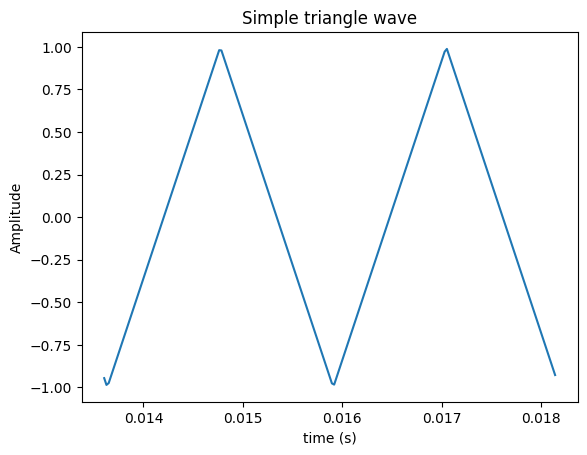

In [4]:
plt.plot(time_scale(200, 44100, offset=600), wave[600:801])
plt.title("Simple triangle wave")
plt.ylabel("Amplitude")
plt.xlabel("time (s)")

## Modulate Frequency

In [5]:
fm_modulation = lambda x: generate_bezier(x, _from=2.0, to=1.0, duration=1.0, control=(0.0, 1.0))

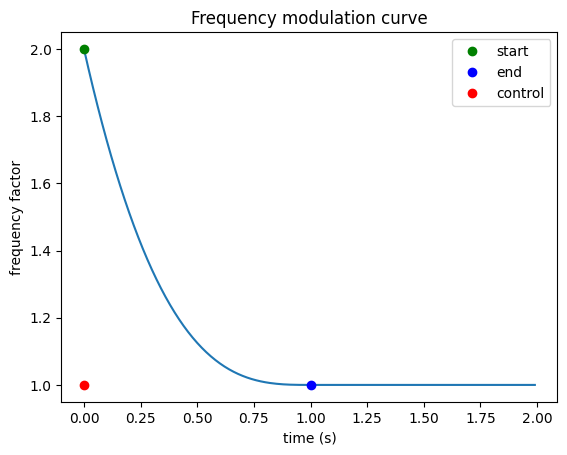

In [6]:
example_signal = [fm_modulation(x / 100) for x in range(200)]
plt.plot([x / 100 for x in range(200)], example_signal)
plt.plot(0.0, 2.0, "go", label="start")
plt.plot(1.0, 1.0, "bo", label="end")
plt.plot(0.0, 1.0, "ro", label="control")
plt.legend()
plt.title("Frequency modulation curve")
plt.ylabel("frequency factor")
plt.xlabel("time (s)")
plt.show()